In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pickle
from test.clock_times import TimeClocker
%matplotlib notebook

In [107]:
fast_file_name = "output_50.pkl"
normal_file_name = "output_0.pkl"
with open(f"./clock_times/{normal_file_name}", "rb") as f_normal, open(f"./clock_times/{fast_file_name}", "rb") as f_fast:
        f = pickle.load(f_fast)
        n = pickle.load(f_normal)

In [109]:
# Make data.
def make_surface_data(data):
    X = data.child_iter
    Y = data.parent_iter
    X, Y = np.meshgrid(X, Y)
    Z = data.time_array
    return X, Y, Z

X, Y, Z_n = make_surface_data(n)
X_f, Y_f, Z_f = make_surface_data(f)
assert (X == X_n).all(), "Normal and fast X axes are not the same"
assert (X == X_n).all(), "Normal and fast Y axes are not the same"


<IPython.core.display.Javascript object>


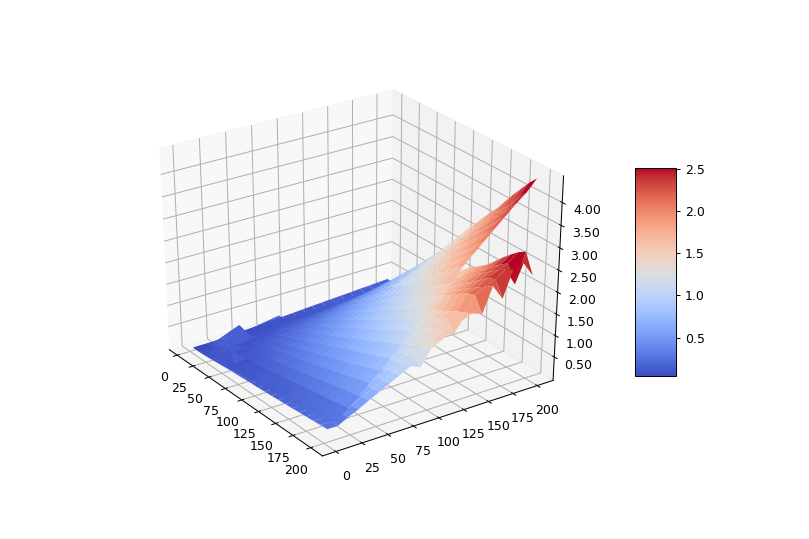

In [118]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_n, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

surf = ax.plot_surface(X, Y, Z_f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

pass


<IPython.core.display.Javascript object>


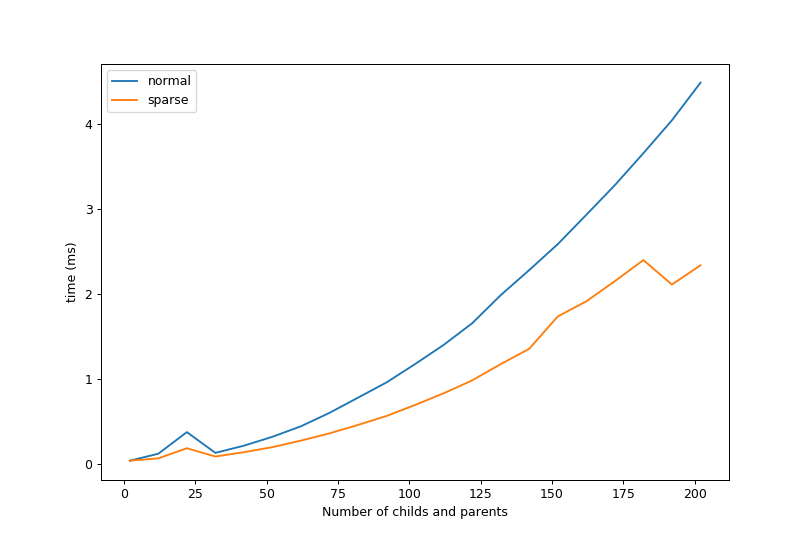

In [132]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

X_ = X.diagonal(0)
ax.plot(X_, Z_n.diagonal(0), label="normal")
ax.plot(X_, Z_f.diagonal(0), label="sparse")
ax.legend()
ax.set_xlabel("Number of childs and parents")
ax.set_ylabel("time (ms)")

pass


<IPython.core.display.Javascript object>


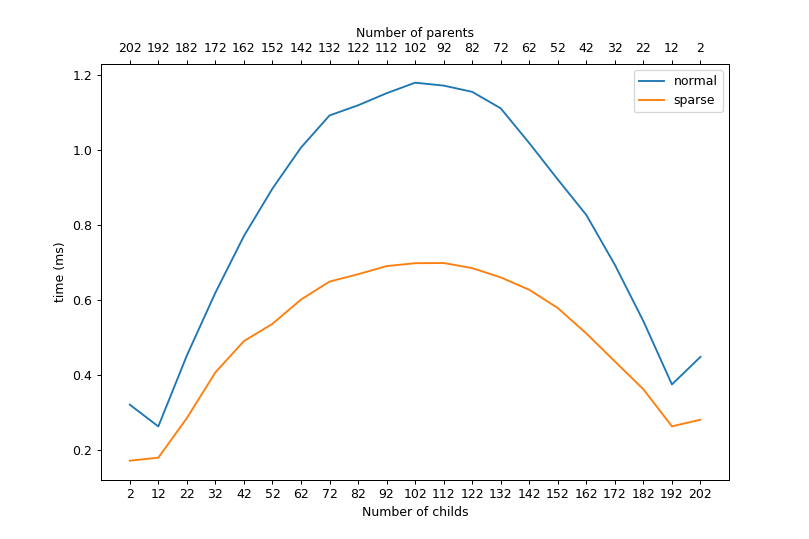

In [133]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

X_ = np.fliplr(X).diagonal(0)

ax1.plot(X_, np.fliplr(Z_n).diagonal(0), label="normal")
ax1.plot(X_, np.fliplr(Z_f).diagonal(0), label="sparse")
ax1.set_xticks(X_)
ax1.set_xlabel("Number of childs")
ax1.legend()
ax1.set_ylabel("time (ms)")

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(X_)
ax2.set_xticklabels(X_[::-1])
ax2.set_xlabel("Number of parents")

pass
